In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [62]:
# convert the data to doubles ranging from 0 to 1, 
# and break into training and validation sets
X_valid = X_train_full[:5000]/255.0 
X_train = X_train_full[5000:]/255.0 
X_test = X_test/255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [63]:
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", \
                         kernel_regularizer=tf.keras.regularizers.l2(0.0001))
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    # fully connected hidden layer
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    my_dense_layer(700),
    # has 10 'neurons' because we have 10 classes
    # the softmax function gives us 10 probabilities
    tf.keras.layers.Dense(10,activation="softmax")
]) 


In [64]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [65]:
# training the nn
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 411s 7ms/sample - loss: 1.0295 - accuracy: 0.8032 - val_loss: 0.8142 - val_accuracy: 0.8680
Epoch 2/10
55000/55000 [==============================] - 389s 7ms/sample - loss: 0.7938 - accuracy: 0.8626 - val_loss: 0.8082 - val_accuracy: 0.8592
Epoch 3/10
55000/55000 [==============================] - 404s 7ms/sample - loss: 0.7140 - accuracy: 0.8796 - val_loss: 0.7129 - val_accuracy: 0.8770
Epoch 4/10
55000/55000 [==============================] - 336s 6ms/sample - loss: 0.6529 - accuracy: 0.8890 - val_loss: 0.6660 - val_accuracy: 0.8804
Epoch 5/10
55000/55000 [==============================] - 284s 5ms/sample - loss: 0.6042 - accuracy: 0.8956 - val_loss: 0.6379 - val_accuracy: 0.8784
Epoch 6/10
55000/55000 [==============================] - 286s 5ms/sample - loss: 0.5566 - accuracy: 0.9012 - val_loss: 0.5895 - val_accuracy: 0.8860
Epoch 7/10
55000/55000 [===========================

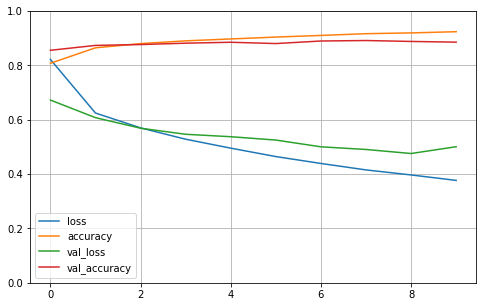

[[5075    3   18   28    3    3  408    0    5    0]
 [  22 5344    4   66    3    4    1    0    0    0]
 [ 101    0 4705   38  481    0  169    0    2    0]
 [  98    0    7 5284   77    1   30    0    1    1]
 [   4    0  255  188 4931    0  130    0    4    0]
 [   0    0    0    0    0 5501    0    2    0    4]
 [ 512    0  330   78  382    1 4195    0    8    1]
 [   0    0    0    0    0  414    0 4983    0   91]
 [  20    1    0   18    1   12    6    1 5450    1]
 [   0    0    0    0    0   11    0   87    0 5396]]


In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# plotting the confusion matrix
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

In [67]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.5626435056686402, 0.8797]